# Stock Price Analysis and Forecasting

The goal of this analysis is to predict future stock prices of major technology companies (Apple, Amazon, Google, Microsoft) using historical data. The analysis includes data collection, exploratory analysis, feature engineering, and the development of an LSTM (Long Short-Term Memory) model to forecast stock prices. The aim is to assess the model's accuracy and derive insights for potential investment strategies.

##  1) Data Collection

In [1]:
import os
import json

kaggle_credentials = {"username":"archanasaikannan", "key":"b1685a7f132df278a3e1cc25bbbfd086"}
os.makedirs('/root/.kaggle', exist_ok=True)

with open('/root/.kaggle/kaggle.json', 'w') as f:
    json.dump(kaggle_credentials, f)

!chmod 600 /root/.kaggle/kaggle.json

In [2]:
!kaggle datasets download -d camnugent/sandp500

Dataset URL: https://www.kaggle.com/datasets/camnugent/sandp500
License(s): CC0-1.0
 78% 15.0M/19.3M [00:00<00:00, 73.4MB/s]
100% 19.3M/19.3M [00:00<00:00, 77.9MB/s]


In [3]:
!unzip sandp500.zip -d /content/

Archive:  sandp500.zip
  inflating: /content/all_stocks_5yr.csv  
  inflating: /content/getSandP.py    
  inflating: /content/individual_stocks_5yr/__MACOSX/individual_stocks_5yr/._.DS_Store  
  inflating: /content/individual_stocks_5yr/__MACOSX/individual_stocks_5yr/._AAPL_data.csv  
  inflating: /content/individual_stocks_5yr/__MACOSX/individual_stocks_5yr/._ABC_data.csv  
  inflating: /content/individual_stocks_5yr/__MACOSX/individual_stocks_5yr/._A_data.csv  
  inflating: /content/individual_stocks_5yr/__MACOSX/individual_stocks_5yr/._MAS_data.csv  
  inflating: /content/individual_stocks_5yr/individual_stocks_5yr/.DS_Store  
  inflating: /content/individual_stocks_5yr/individual_stocks_5yr/AAL_data.csv  
  inflating: /content/individual_stocks_5yr/individual_stocks_5yr/AAPL_data.csv  
  inflating: /content/individual_stocks_5yr/individual_stocks_5yr/AAP_data.csv  
  inflating: /content/individual_stocks_5yr/individual_stocks_5yr/ABBV_data.csv  
  inflating: /content/individual_sto

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
import os

# List all files in the directory to verify the files
os.listdir('/content/individual_stocks_5yr/individual_stocks_5yr')

['SWK_data.csv',
 'HPQ_data.csv',
 'AZO_data.csv',
 'HCA_data.csv',
 'AWK_data.csv',
 'HON_data.csv',
 'LEG_data.csv',
 'KMB_data.csv',
 'LEN_data.csv',
 'GE_data.csv',
 'GPC_data.csv',
 'VRSK_data.csv',
 'PYPL_data.csv',
 'BIIB_data.csv',
 'HRS_data.csv',
 'FL_data.csv',
 'BSX_data.csv',
 'AON_data.csv',
 'TSCO_data.csv',
 'MCO_data.csv',
 'APC_data.csv',
 'URI_data.csv',
 'CHRW_data.csv',
 'FITB_data.csv',
 'CFG_data.csv',
 'ADI_data.csv',
 'DLR_data.csv',
 'MCHP_data.csv',
 'EXPE_data.csv',
 'CCI_data.csv',
 'TROW_data.csv',
 'GGP_data.csv',
 'TRIP_data.csv',
 'RF_data.csv',
 'MET_data.csv',
 'TXN_data.csv',
 'CMI_data.csv',
 'KR_data.csv',
 'SYK_data.csv',
 'WDC_data.csv',
 'ACN_data.csv',
 'PG_data.csv',
 'SIG_data.csv',
 'SLG_data.csv',
 'ABT_data.csv',
 'RJF_data.csv',
 'IBM_data.csv',
 'PRU_data.csv',
 'OKE_data.csv',
 'IR_data.csv',
 'AEP_data.csv',
 'ANDV_data.csv',
 'CAH_data.csv',
 'STX_data.csv',
 'VIAB_data.csv',
 'ICE_data.csv',
 'SPGI_data.csv',
 'YUM_data.csv',
 'NWS_d

In [13]:
len(os.listdir('/content/individual_stocks_5yr/individual_stocks_5yr'))     # total files

506

In [11]:
from warnings import filterwarnings
filterwarnings('ignore')

In [14]:
# List of stocks that we consider for analysis - Apple, Amazon, Google, and Microsoft
company_list = ['AAPL', 'AMZN', 'GOOG', 'MSFT']
all_data = pd.DataFrame()

for company in company_list:
    file_path = f'/content/individual_stocks_5yr/individual_stocks_5yr/{company}_data.csv'
    company_df = pd.read_csv(file_path)
    all_data = pd.concat([all_data, company_df], ignore_index=True)

In [15]:
all_data.shape

(4752, 7)

In [16]:
all_data.head()

,date,open,high,low,close,volume,Name
0,2013-02-08,67.7142,68.4014,66.8928,67.8542,158168416,AAPL
1,2013-02-11,68.0714,69.2771,67.6071,68.5614,129029425,AAPL
2,2013-02-12,68.5014,68.9114,66.8205,66.8428,151829363,AAPL
3,2013-02-13,66.7442,67.6628,66.1742,66.7156,118721995,AAPL
4,2013-02-14,66.3599,67.3771,66.2885,66.6556,88809154,AAPL


In [17]:
all_data['Name'].unique()

array(['AAPL', 'AMZN', 'GOOG', 'MSFT'], dtype=object)

## 2) Analyzing change in price of the stock overtime

In [18]:
all_data.isnull().sum() # checking missing values

,0
date,0
open,0
high,0
low,0
close,0
volume,0
Name,0


In [19]:
all_data.dtypes # checking data-types

,0
date,object
open,float64
high,float64
low,float64
close,float64
volume,int64
Name,object


In [21]:
all_data['date'] = pd.to_datetime(all_data['date'])
all_data['date'].dtype

dtype('<M8[ns]')

In [22]:
all_data['date']

,date
0,2013-02-08
1,2013-02-11
2,2013-02-12
3,2013-02-13
4,2013-02-14
...,...
4747,2018-02-01
4748,2018-02-02
4749,2018-02-05
4750,2018-02-06


In [23]:
company_list

['AAPL', 'AMZN', 'GOOG', 'MSFT']

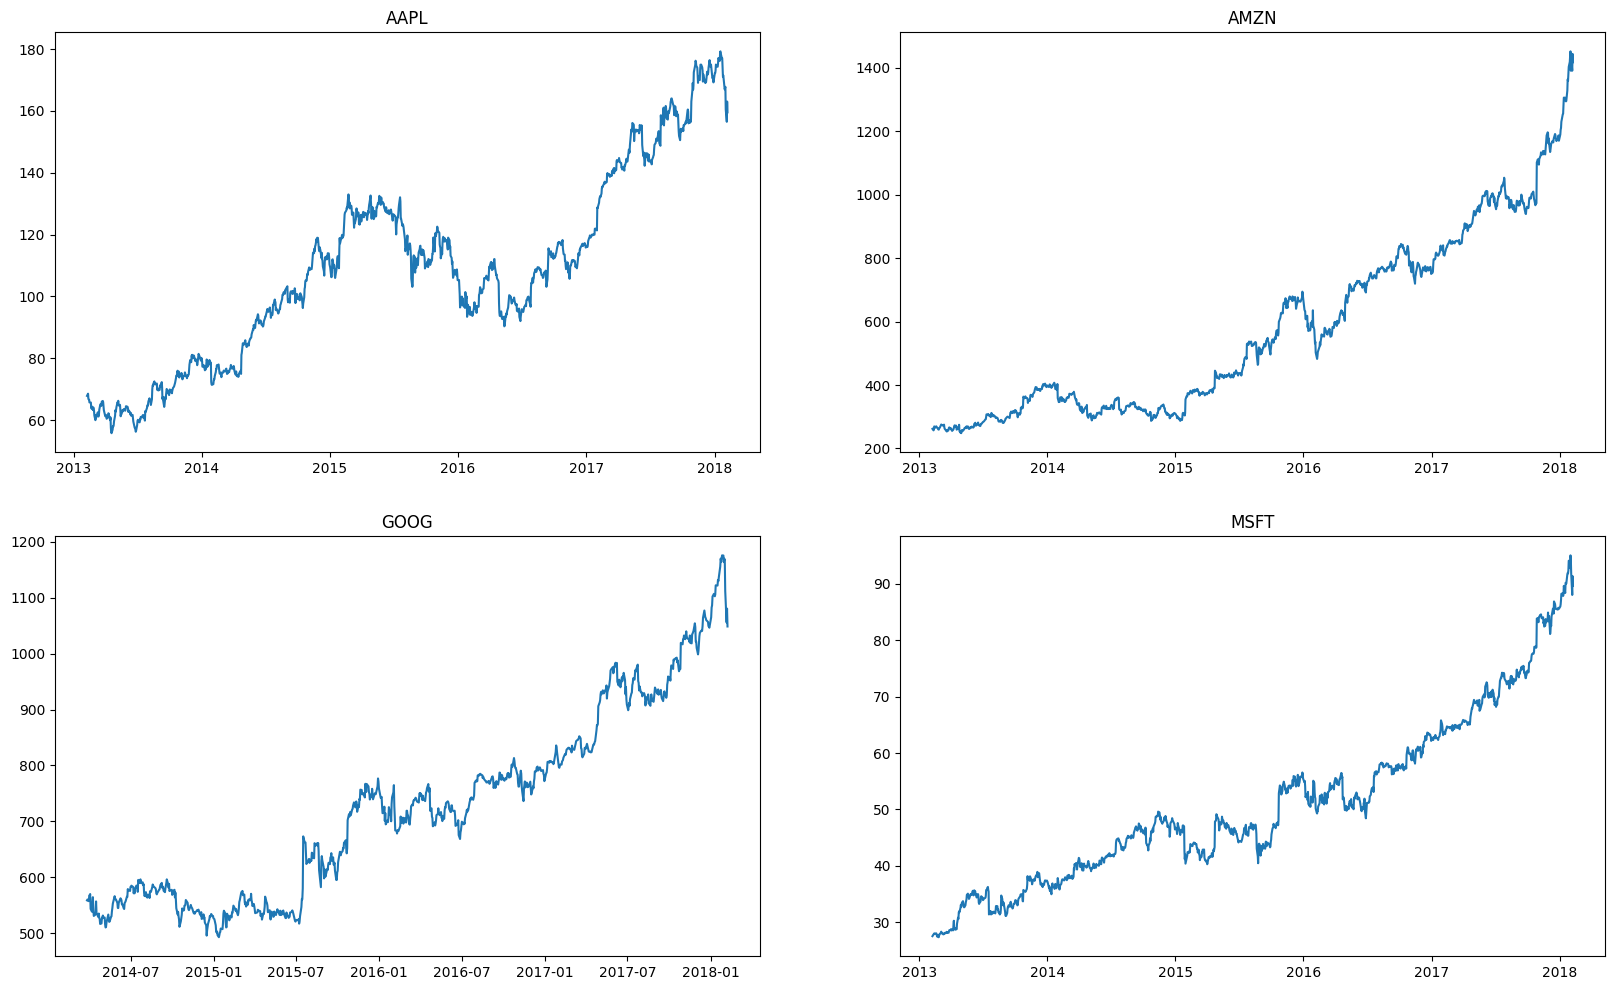

In [24]:
plt.figure(figsize=(20,12))

for index , company in enumerate(company_list , 1):
    plt.subplot(2,2, index)  # creating subplot for each stock
    df = all_data[all_data['Name']==company]
    plt.plot(df['date'] , df['close']) # plotting "date" vs "close"
    plt.title(company)

- **Upward Trend**: The overall trend of the data appears to be upward. This suggests that the value being plotted has been increasing over time.

- **Volatility**: There is significant volatility in the data. This means that the value fluctuates quite a bit, with periods of rapid increases and decreases.

## 3) Moving average of various stocks

In [25]:
all_data.head(15)

,date,open,high,low,close,volume,Name
0,2013-02-08,67.7142,68.4014,66.8928,67.8542,158168416,AAPL
1,2013-02-11,68.0714,69.2771,67.6071,68.5614,129029425,AAPL
2,2013-02-12,68.5014,68.9114,66.8205,66.8428,151829363,AAPL
3,2013-02-13,66.7442,67.6628,66.1742,66.7156,118721995,AAPL
4,2013-02-14,66.3599,67.3771,66.2885,66.6556,88809154,AAPL
5,2013-02-15,66.9785,67.1656,65.7028,65.7371,97924631,AAPL
6,2013-02-19,65.8714,66.1042,64.8356,65.7128,108854046,AAPL
7,2013-02-20,65.3842,65.3842,64.1142,64.1214,118891367,AAPL
8,2013-02-21,63.7142,64.1671,63.2599,63.7228,111596821,AAPL
9,2013-02-22,64.1785,64.5142,63.7999,64.4014,82583823,AAPL


In [26]:
# Calculate the 10-day rolling average of the closing prices
# This smooths out short-term fluctuations and helps identify longer-term trends.
all_data['close'].rolling(window=10).mean().head(14)

,close
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
5,NaN
6,NaN
7,NaN
8,NaN
9,66.03251


In [27]:
new_data = all_data.copy()

In [28]:
# Let's consider different windows of rolling - 10 days, 20 days, 50 days
ma_day = [10, 20, 50]

for ma in ma_day:
    new_data['close_'+str(ma)] = new_data['close'].rolling(ma).mean()

In [29]:
new_data.tail(7)

,date,open,high,low,close,volume,Name,close_10,close_20,close_50
4745,2018-01-30,93.30,93.660,92.1000,92.74,38635053,MSFT,91.862,89.8285,86.5244
4746,2018-01-31,93.75,95.400,93.5100,95.01,48756338,MSFT,92.349,90.2815,86.7606
4747,2018-02-01,94.79,96.070,93.5813,94.26,47227882,MSFT,92.765,90.6770,86.9978
4748,2018-02-02,93.64,93.970,91.5000,91.78,47867753,MSFT,92.943,90.9105,87.1828
4749,2018-02-05,90.56,93.240,88.0000,88.00,51031465,MSFT,92.582,90.9010,87.2684
4750,2018-02-06,86.89,91.475,85.2500,91.33,67998564,MSFT,92.525,91.0535,87.4328
4751,2018-02-07,90.49,91.770,89.2000,89.61,41107592,MSFT,92.304,91.1230,87.5598


In [30]:
new_data.set_index('date', inplace=True)

In [31]:
new_data

,open,high,low,close,volume,Name,close_10,close_20,close_50
date,,,,,,,,,
2013-02-08,67.7142,68.4014,66.8928,67.8542,158168416,AAPL,NaN,NaN,NaN
2013-02-11,68.0714,69.2771,67.6071,68.5614,129029425,AAPL,NaN,NaN,NaN
2013-02-12,68.5014,68.9114,66.8205,66.8428,151829363,AAPL,NaN,NaN,NaN
2013-02-13,66.7442,67.6628,66.1742,66.7156,118721995,AAPL,NaN,NaN,NaN
2013-02-14,66.3599,67.3771,66.2885,66.6556,88809154,AAPL,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
2018-02-01,94.7900,96.0700,93.5813,94.2600,47227882,MSFT,92.765,90.6770,86.9978
2018-02-02,93.6400,93.9700,91.5000,91.7800,47867753,MSFT,92.943,90.9105,87.1828
2018-02-05,90.5600,93.2400,88.0000,88.0000,51031465,MSFT,92.582,90.9010,87.2684


In [32]:
new_data.columns

Index(['open', 'high', 'low', 'close', 'volume', 'Name', 'close_10',
       'close_20', 'close_50'],
      dtype='object')

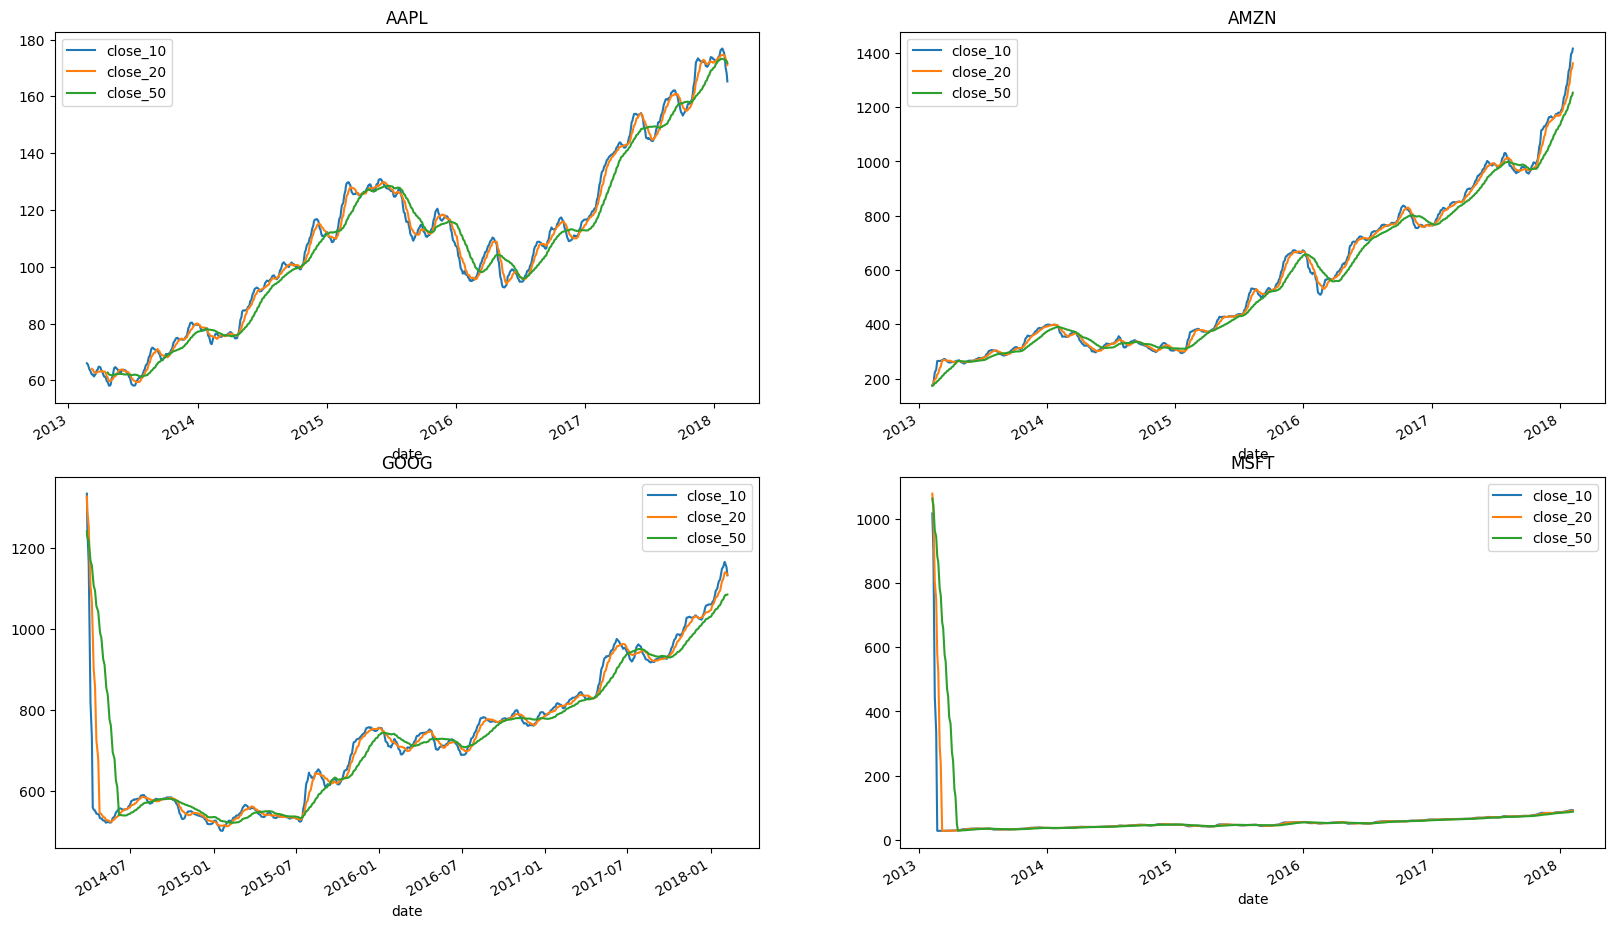

In [33]:
plt.figure(figsize=(20,12))

for index , company in enumerate(company_list , 1):
    plt.subplot(2,2, index)
    df = new_data[new_data['Name']==company]
    df[['close_10','close_20', 'close_50']].plot(ax=plt.gca())
    plt.title(company)

- **Smoothing**: The moving averages have smoothed out the original data, making the overall trend clearer.

- **Trend Strength**: The fact that the moving averages are also increasing suggests a strong upward trend.

- **Momentum**: The shorter-term moving averages like 10-day are more responsive to recent price changes and can indicate the momentum of the trend.

## 4) Analyse Closing price change in apple stock.

### Daily Stock Return and Gain/Loss

- **Daily Return Formula**:  
To calculate the **daily return** of a stock, use the following formula:

$$
\text{Daily Return} = \frac{\text{Close Price on Day t} - \text{Close Price on Day (t-1)}}{\text{Close Price on Day (t-1)}}
$$

This gives you the percentage change in the stock's price from one day to the next.

- **Dollar Gain/Loss Formula**:  
To calculate the **dollar gain or loss** based on the **opening and closing prices**:

$$
\text{Dollar Gain/Loss} = (\text{Close Price on Day t} - \text{Open Price on Day t}) \times \text{Number of Shares}
$$

This formula calculates the change in value for the shares you own, based on the day's price movement.

### Example:
- **Open Price**: \$100  
- **Close Price**: \$105  
- **Shares Owned**: 50

#### Dollar Gain/Loss:
$$
(105 - 100) \times 50 = 250
$$

**Gain**: \$250

#### Daily Return:
$$
\frac{105 - 100}{100} = 5\%
$$

**Daily Return**: 5%


In [34]:
company_list

['AAPL', 'AMZN', 'GOOG', 'MSFT']

In [45]:
apple = pd.read_csv('/content/individual_stocks_5yr/individual_stocks_5yr/AAPL_data.csv')
apple.head(4)

,date,open,high,low,close,volume,Name
0,2013-02-08,67.7142,68.4014,66.8928,67.8542,158168416,AAPL
1,2013-02-11,68.0714,69.2771,67.6071,68.5614,129029425,AAPL
2,2013-02-12,68.5014,68.9114,66.8205,66.8428,151829363,AAPL
3,2013-02-13,66.7442,67.6628,66.1742,66.7156,118721995,AAPL


In [38]:
apple['close']

,close
0,67.8542
1,68.5614
2,66.8428
3,66.7156
4,66.6556
...,...
1254,167.7800
1255,160.5000
1256,156.4900
1257,163.0300


In [46]:
apple['Daily return (in %)'] = apple['close'].pct_change() * 100
# pct_change() returns : Percentage change between the current and a prior element.

In [47]:
# Drop the first row since the daily return for the first day will be NaN
apple = apple.dropna(subset=['Daily return (in %)'])
apple.head(4)

,date,open,high,low,close,volume,Name,Daily return (in %)
1,2013-02-11,68.0714,69.2771,67.6071,68.5614,129029425,AAPL,1.042235
2,2013-02-12,68.5014,68.9114,66.8205,66.8428,151829363,AAPL,-2.506658
3,2013-02-13,66.7442,67.6628,66.1742,66.7156,118721995,AAPL,-0.190297
4,2013-02-14,66.3599,67.3771,66.2885,66.6556,88809154,AAPL,-0.089934


In [64]:
apple['date'] = pd.to_datetime(apple['date'])
years = apple['date'].dt.year.unique()
years

array([2013, 2014, 2015, 2016, 2017, 2018], dtype=int32)

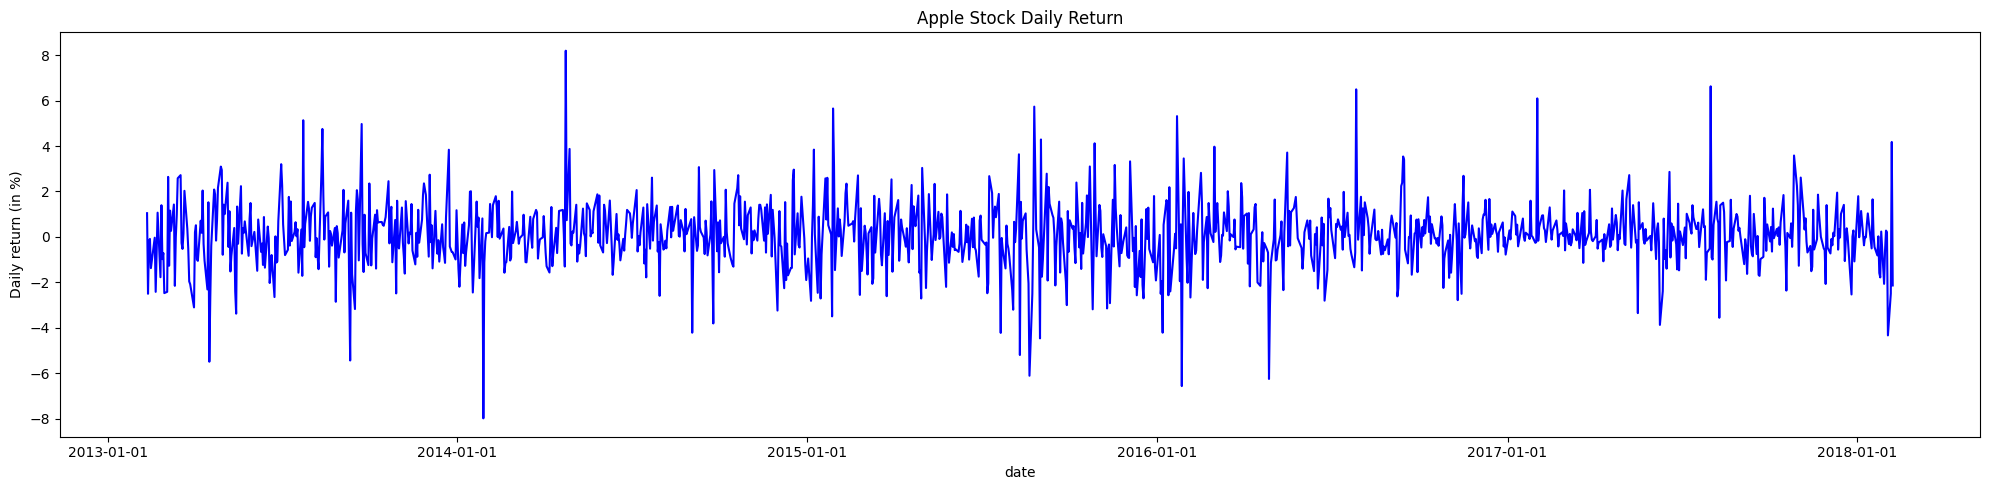

In [67]:
plt.figure(figsize=(20, 5))
sns.lineplot(x='date', y='Daily return (in %)', data=apple, color='blue')
plt.title('Apple Stock Daily Return')
plt.xticks(ticks=pd.to_datetime(years, format='%Y'))
plt.tight_layout()
plt.show()

In [43]:
import plotly.express as px
px.line(apple , x="date" , y="Daily return(in %)")

- **Volatility**: The returns exhibit high volatility, fluctuating between large positive and negative values.

- **No Clear Trend**: There doesn't appear to be a consistent upward or downward trend in the returns. They seem to be randomly distributed around zero.

- **Stationarity**: The returns might be considered stationary, meaning their statistical properties (e.g., mean, variance) remain constant over time.

## 5) Performing resampling analysis of closing price


Before resampling, let's make sure to set the `date` feature as the **row index** to enable resampling based on various time frequencies. We can then resample the data on different time intervals such as:

- **Yearly** (`'Y'`)
- **Quarterly** (`'Q'`)
- **Monthly** (`'M'`)
- **Weekly** (`'W'`)
- **Daily** (`'D'`)
- **Every 3 minutes** (`'3T'`)
- **Every 30 seconds** (`'30S'`)
- **Custom intervals** (e.g., `'15min'` for 15-minute bins)

In [68]:
apple.dtypes

,0
date,datetime64[ns]
open,float64
high,float64
low,float64
close,float64
volume,int64
Name,object
Daily return (in %),float64


In [69]:
apple.set_index('date', inplace=True)
apple.head(4)

,open,high,low,close,volume,Name,Daily return (in %)
date,,,,,,,
2013-02-11,68.0714,69.2771,67.6071,68.5614,129029425,AAPL,1.042235
2013-02-12,68.5014,68.9114,66.8205,66.8428,151829363,AAPL,-2.506658
2013-02-13,66.7442,67.6628,66.1742,66.7156,118721995,AAPL,-0.190297
2013-02-14,66.3599,67.3771,66.2885,66.6556,88809154,AAPL,-0.089934


In [70]:
apple['close'].resample('M').mean() ## resample data on monthly basis

,close
date,
2013-02-28,65.110269
2013-03-31,63.120110
2013-04-30,59.966432
2013-05-31,63.778927
2013-06-30,60.791120
...,...
2017-10-31,157.817273
2017-11-30,172.406190
2017-12-31,171.891500


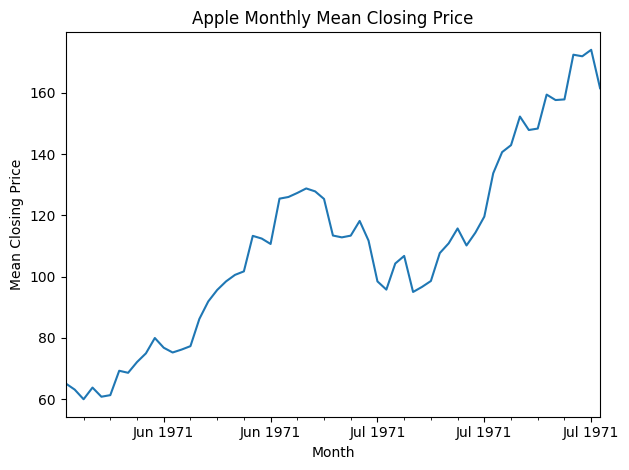

In [108]:
import matplotlib.dates as mdates

# Resample the 'close' prices by month and plot the mean closing price per month
apple['close'].resample('M').mean().plot()
plt.title('Apple Monthly Mean Closing Price')
plt.xlabel('Month')
plt.ylabel('Mean Closing Price')
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
plt.tight_layout()
plt.show()

- **Upward Trend**: There is a clear upward trend in the monthly average closing prices over the period.

- **Volatility**: The monthly averages exhibit some volatility, with fluctuations around the overall upward trend.

In [72]:
apple['close'].resample('Y').mean() ## resample data on Yearly basis

,close
date,
2013-12-31,67.235100
2014-12-31,92.264531
2015-12-31,120.039861
2016-12-31,104.604008
2017-12-31,150.585080
2018-12-31,171.594231


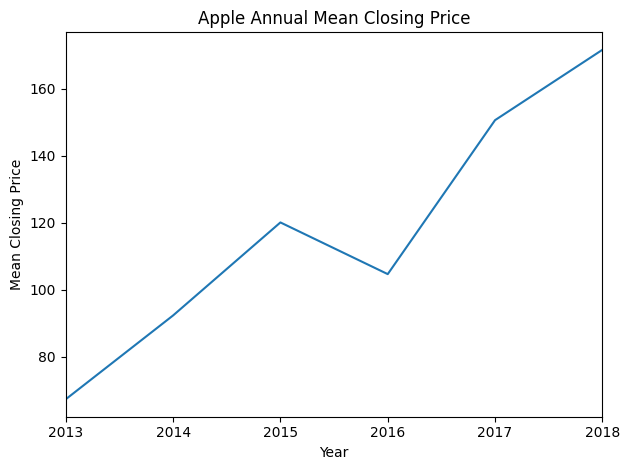

In [105]:
# Resample the 'close' prices by year and plot the mean closing price per year
apple['close'].resample('Y').mean().plot()
plt.title('Apple Annual Mean Closing Price')
plt.xlabel('Year')
plt.ylabel('Mean Closing Price')
plt.tight_layout()
plt.show()

- **Upward Trend**: There is a clear upward trend in the yearly average closing prices over the period.

- **Less Volatility**: Compared to the monthly averages, the yearly averages show less volatility. This is expected since averaging over a longer period smooths out short-term fluctuations.

In [74]:
apple['close'].resample('Q').mean() ## resample data on Quarterly basis

,close
date,
2013-03-31,63.904112
2013-06-30,61.534692
2013-09-30,66.320670
2013-12-31,75.567478
2014-03-31,76.086293
2014-06-30,85.117475
2014-09-30,98.163311
2014-12-31,108.821016
2015-03-31,120.776721


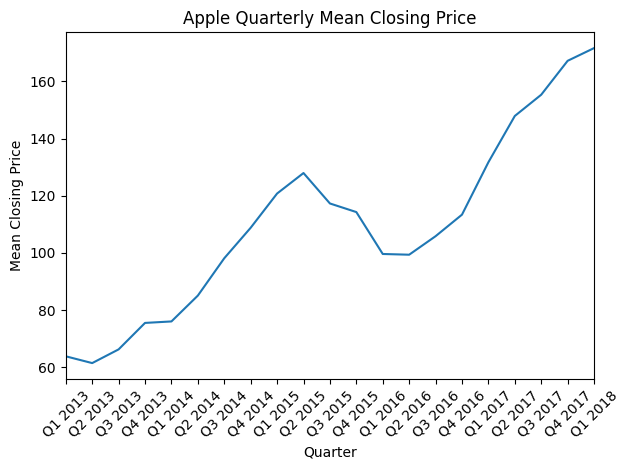

In [112]:
# Resample the 'close' prices by quarter and plot the mean closing price per quarter
apple['close'].resample('Q').mean().plot()
plt.title('Apple Quarterly Mean Closing Price')
plt.xlabel('Quarter')
plt.ylabel('Mean Closing Price')
plt.xticks(ticks=apple['close'].resample('Q').mean().index,
           labels=[f'Q{d.quarter} {d.year}' for d in apple['close'].resample('Q').mean().index], rotation=45)
plt.tight_layout()
plt.show()

- **Upward Trend**: There is a clear upward trend in the quarterly average closing prices over the period.

- **Volatility**: The quarterly averages exhibit some volatility, with fluctuations around the overall upward trend.

## 6) To check Whether closing prices of the tech companies Amazon, Apple, Google, and Microsoft are correlated

In [76]:
company_list

['AAPL', 'AMZN', 'GOOG', 'MSFT']

In [79]:
closing_price = pd.DataFrame()    # empty dictionary to store the closing prices

for company in company_list:
    file_path = f'/content/individual_stocks_5yr/individual_stocks_5yr/{company}_data.csv'
    data = pd.read_csv(file_path)
    closing_price[f'{company.lower()}_close'] = data['close']   # Add the company's closing prices to the closing_price DataFrame

In [80]:
closing_price

,aapl_close,amzn_close,goog_close,msft_close
0,67.8542,261.95,558.46,27.55
1,68.5614,257.21,559.99,27.86
2,66.8428,258.70,556.97,27.88
3,66.7156,269.47,567.16,28.03
4,66.6556,269.24,567.00,28.04
...,...,...,...,...
1254,167.7800,1390.00,NaN,94.26
1255,160.5000,1429.95,NaN,91.78
1256,156.4900,1390.00,NaN,88.00
1257,163.0300,1442.84,NaN,91.33


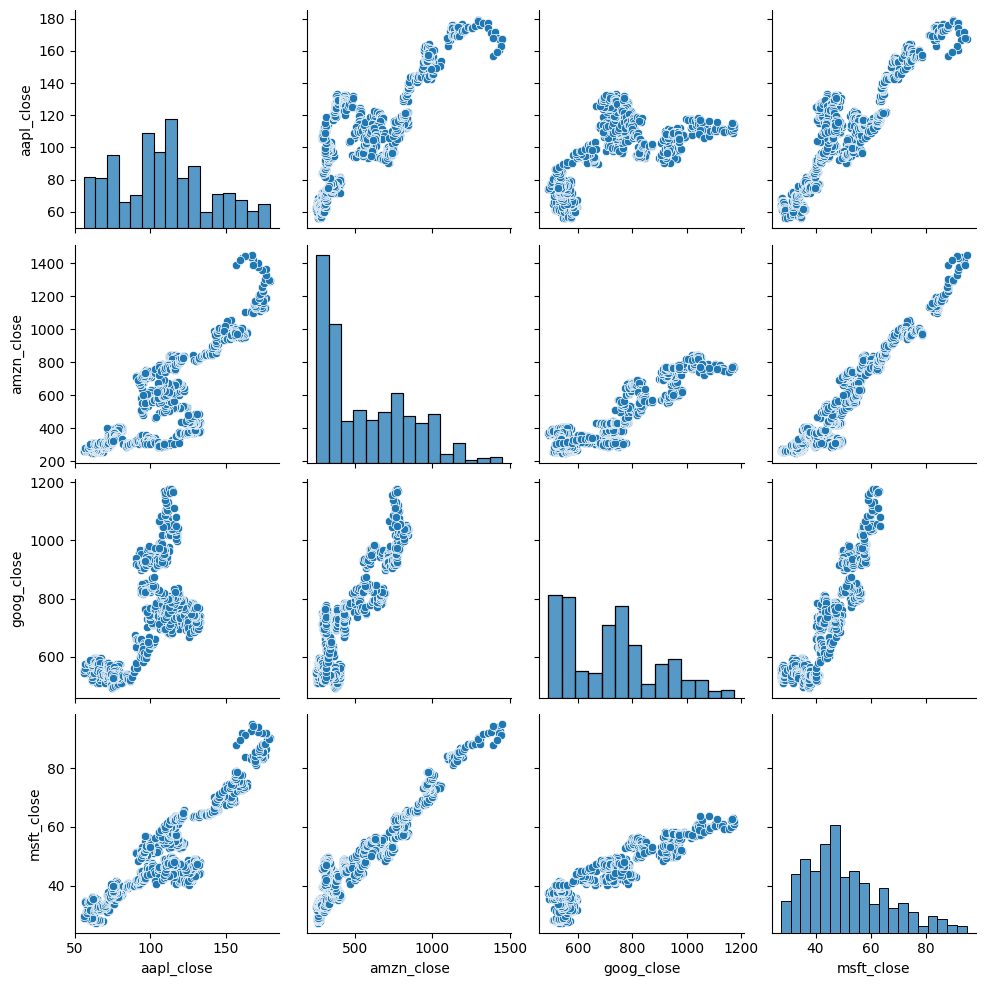

In [81]:
sns.pairplot(closing_price)

<Axes: >

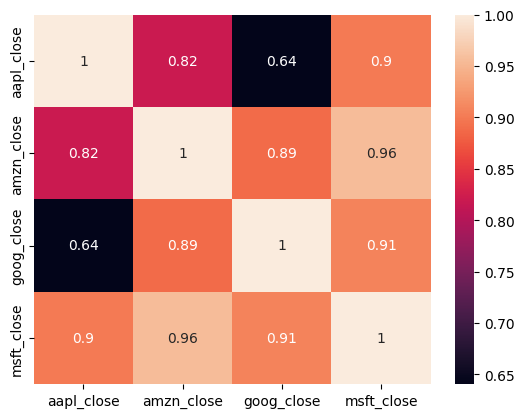

In [83]:
sns.heatmap(closing_price.corr() , annot=True)     # Correlation of stock prices

1. **High Correlation**:
   - **MSFT** and **AMZN** have the highest correlation (0.96), indicating that their closing prices move similarly.
   - **AAPL** and **MSFT** show a strong positive correlation (0.90), suggesting their prices often rise and fall together.

2. **Moderate Correlation**:
   - **AMZN** and **GOOG** also exhibit a strong correlation (0.89), meaning their closing prices are similarly affected by market factors.

3. **Weaker Correlation**:
   - **AAPL** and **GOOG** show a moderate correlation (0.64), indicating their prices do not always move in sync.
   - The correlation between **AAPL** and **GOOG** is notably lower than with **MSFT**.

These insights can guide investors in understanding how these stocks are interrelated, which can be useful for portfolio diversification and risk management strategies.

## 7) Analyse Whether Daily change in Closing price of stocks or Daily Returns in Stock are correlated

In [86]:
closing_price

,aapl_close,amzn_close,goog_close,msft_close
0,67.8542,261.95,558.46,27.55
1,68.5614,257.21,559.99,27.86
2,66.8428,258.70,556.97,27.88
3,66.7156,269.47,567.16,28.03
4,66.6556,269.24,567.00,28.04
...,...,...,...,...
1254,167.7800,1390.00,NaN,94.26
1255,160.5000,1429.95,NaN,91.78
1256,156.4900,1390.00,NaN,88.00
1257,163.0300,1442.84,NaN,91.33


In [91]:
closing_price['aapl_close'].head()

,aapl_close
0,67.8542
1,68.5614
2,66.8428
3,66.7156
4,66.6556


In [92]:
closing_price['aapl_close'].shift(1).head()

,aapl_close
0,NaN
1,67.8542
2,68.5614
3,66.8428
4,66.7156


In [94]:
# Calculate the daily return for AAPL
# We calculate the percentage change in AAPL's closing price compared to the previous day.
#   The formula subtracts the previous day's close from the current day's close, divides by the previous day's close, and multiplies by 100 to get the percentage change.
(closing_price['aapl_close'] - closing_price['aapl_close'].shift(1)) / closing_price['aapl_close'].shift(1) * 100

,aapl_close
0,NaN
1,1.042235
2,-2.506658
3,-0.190297
4,-0.089934
...,...
1254,0.209043
1255,-4.339015
1256,-2.498442
1257,4.179181


In [97]:
for col in closing_price.columns:
    closing_price[col + '_pct_change'] = (closing_price[col] - closing_price[col].shift(1))/closing_price[col].shift(1) * 100

In [98]:
closing_price

,aapl_close,amzn_close,goog_close,msft_close,aapl_close_pct_change,amzn_close_pct_change,goog_close_pct_change,msft_close_pct_change
0,67.8542,261.95,558.46,27.55,NaN,NaN,NaN,NaN
1,68.5614,257.21,559.99,27.86,1.042235,-1.809506,0.273968,1.125227
2,66.8428,258.70,556.97,27.88,-2.506658,0.579293,-0.539295,0.071788
3,66.7156,269.47,567.16,28.03,-0.190297,4.163123,1.829542,0.538020
4,66.6556,269.24,567.00,28.04,-0.089934,-0.085353,-0.028211,0.035676
...,...,...,...,...,...,...,...,...
1254,167.7800,1390.00,NaN,94.26,0.209043,-4.196734,NaN,-0.789391
1255,160.5000,1429.95,NaN,91.78,-4.339015,2.874101,NaN,-2.631021
1256,156.4900,1390.00,NaN,88.00,-2.498442,-2.793804,NaN,-4.118544
1257,163.0300,1442.84,NaN,91.33,4.179181,3.801439,NaN,3.784091


In [99]:
closing_price.columns

Index(['aapl_close', 'amzn_close', 'goog_close', 'msft_close',
       'aapl_close_pct_change', 'amzn_close_pct_change',
       'goog_close_pct_change', 'msft_close_pct_change'],
      dtype='object')

In [101]:
close_pct_change = closing_price.iloc[:, 4:]
close_pct_change.head(3)

,aapl_close_pct_change,amzn_close_pct_change,goog_close_pct_change,msft_close_pct_change
0,NaN,NaN,NaN,NaN
1,1.042235,-1.809506,0.273968,1.125227
2,-2.506658,0.579293,-0.539295,0.071788


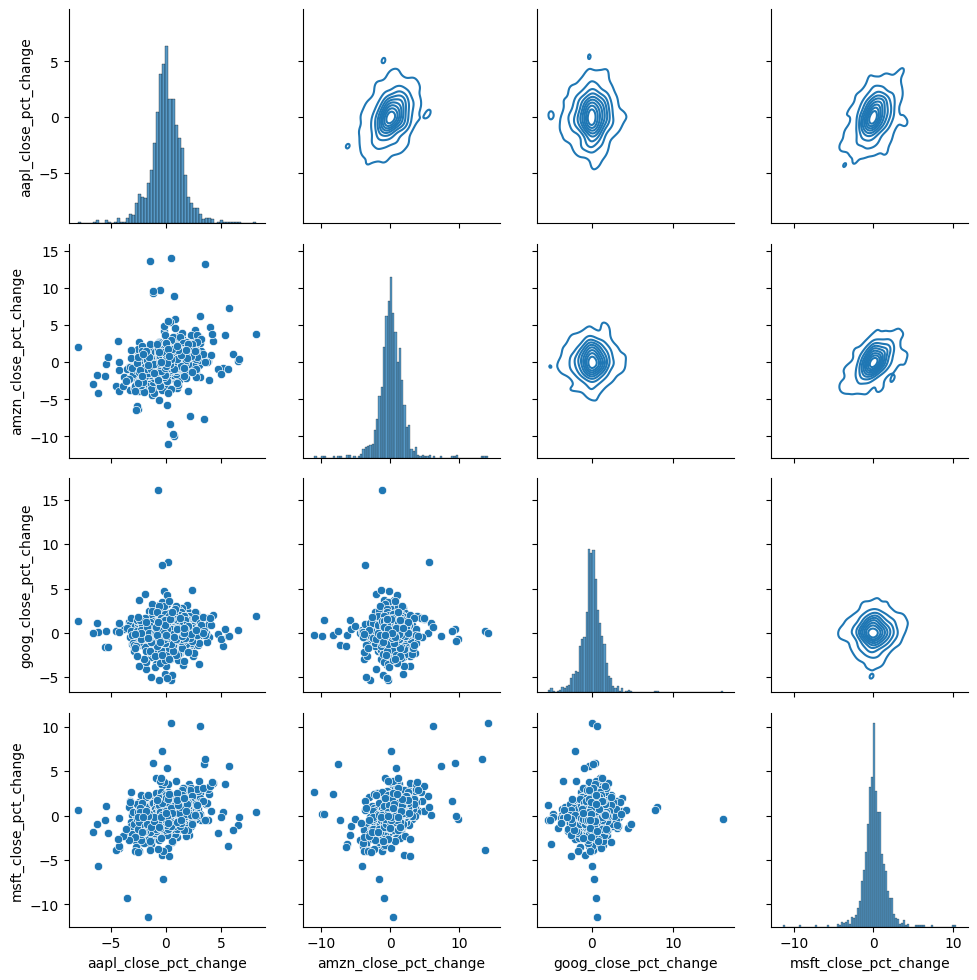

In [102]:
pg = sns.PairGrid(data=close_pct_change)
pg.map_diag(sns.histplot)
pg.map_lower(sns.scatterplot)
pg.map_upper(sns.kdeplot)

<Axes: >

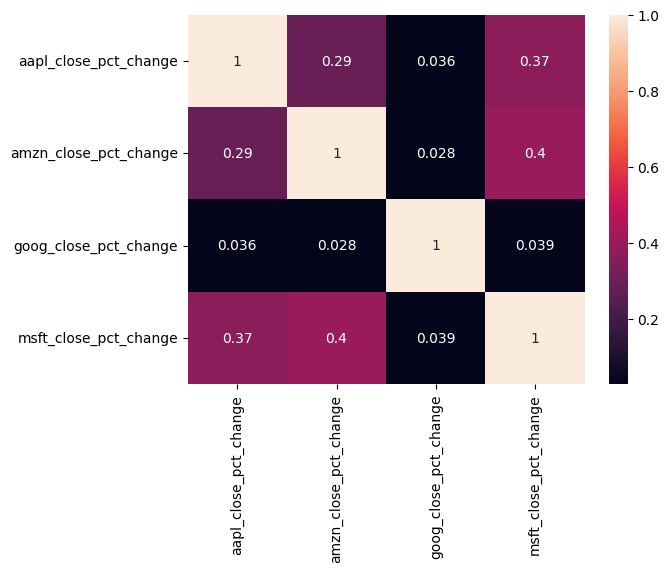

In [104]:
sns.heatmap(close_pct_change.corr() , annot=True)

1. **Moderate Positive Correlation**:
   - **AMZN** and **MSFT** show the strongest correlation (0.40), suggesting they tend to move in the same direction in terms of percentage change in closing prices.
   - **AAPL** and **MSFT** also show a moderate correlation (0.37).

2. **Weak Correlation**:
   - **AAPL** and **AMZN** show a modest correlation (0.29), indicating some similarity in their price movements.
   - **GOOG** has a very weak correlation with the other stocks, with its highest correlation being 0.04 with **AAPL** and **AMZN**.

3. **Low Interaction Between GOOG and Others**:
   - **GOOG** exhibits weak correlations across the board, suggesting its price movement is less influenced by the other stocks in the dataset.

This analysis reveals that **Amazon** and **Microsoft** have a stronger relationship in terms of price changes compared to **Apple** and **Google**, with **Google** showing minimal correlation with the others. These insights can help in understanding the interdependence between these stocks and inform portfolio diversification strategies.

# Forecasting Stock Prices Using LSTM (Long Short-Term Memory)

Let's forecast stock prices using an LSTM (Long Short-Term Memory) network, which is an advanced type of recurrent neural network (RNN) that is well-suited for time-series forecasting tasks.

## 1. Import Necessary Libraries

In [113]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

## 2. Load and Preprocess the Data

Next, we'll load the stock data and preprocess it for use with an LSTM model.

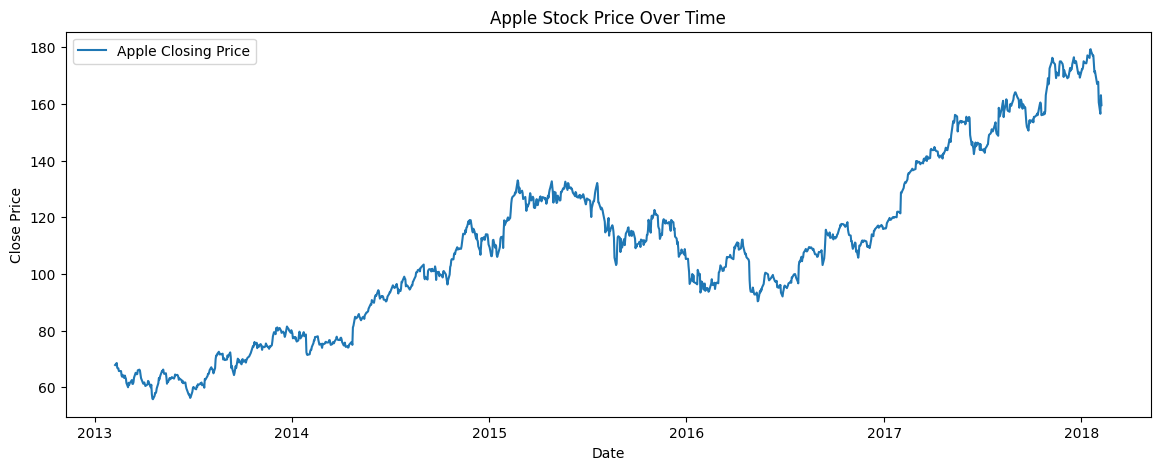

In [117]:
# Load the stock data
apple = pd.read_csv('/content/individual_stocks_5yr/individual_stocks_5yr/AAPL_data.csv')

apple['date'] = pd.to_datetime(apple['date'])   # Convert the 'date' column to datetime format
apple.set_index('date', inplace=True)   # Set 'date' as the index

# Visualize the closing prices
plt.figure(figsize=(14, 5))
plt.plot(apple['close'], label='Apple Closing Price')
plt.title('Apple Stock Price Over Time')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()

## 3. Data Preprocessing for LSTM

LSTM models require data to be scaled and reshaped into sequences. We will use MinMaxScaler to scale the data and create sequences for input into the model.

In [118]:
# Extract the 'close' price for training
data = apple['close'].values
data = data.reshape(-1, 1)

# Scale the data using MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)

# Create the data structure with 60 timesteps and 1 output
X = []
y = []

for i in range(60, len(scaled_data)):
    X.append(scaled_data[i-60:i, 0])  # 60 previous data points
    y.append(scaled_data[i, 0])       # Next day price

X = np.array(X)
y = np.array(y)

# Reshape X for LSTM [samples, time steps, features]
X = X.reshape(X.shape[0], X.shape[1], 1)

## 4. Split Data into Training and Test Sets

Now, we will split the data into training and test sets. Typically, 80-90% of the data is used for training, and the remaining for testing.

In [119]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Check the shape of the data
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(959, 60, 1) (240, 60, 1) (959,) (240,)


## 5. Build and Train the LSTM Model

Now that our data is ready, we can define and train the LSTM model.

In [120]:
# Build the LSTM model
model = Sequential()

# Add LSTM layers with Dropout for regularization
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.2))

model.add(LSTM(units=50, return_sequences=False))
model.add(Dropout(0.2))

model.add(Dense(units=1))  # Output layer (predicting the closing price)

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32)

Epoch 1/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 5s 59ms/step - loss: 0.0567
Epoch 2/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 63ms/step - loss: 0.0047
Epoch 3/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 5s 141ms/step - loss: 0.0028
Epoch 4/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 104ms/step - loss: 0.0025
Epoch 5/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 65ms/step - loss: 0.0022
Epoch 6/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 58ms/step - loss: 0.0019
Epoch 7/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 6s 197ms/step - loss: 0.0024
Epoch 8/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 5s 160ms/step - loss: 0.0019
Epoch 9/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 88ms/step - loss: 0.0017
Epoch 10/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 58ms/step - loss: 0.0020


## 6. Make Predictions and Evaluate the Model

After training the model, we can make predictions on the test set and visualize the results.

8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 86ms/step


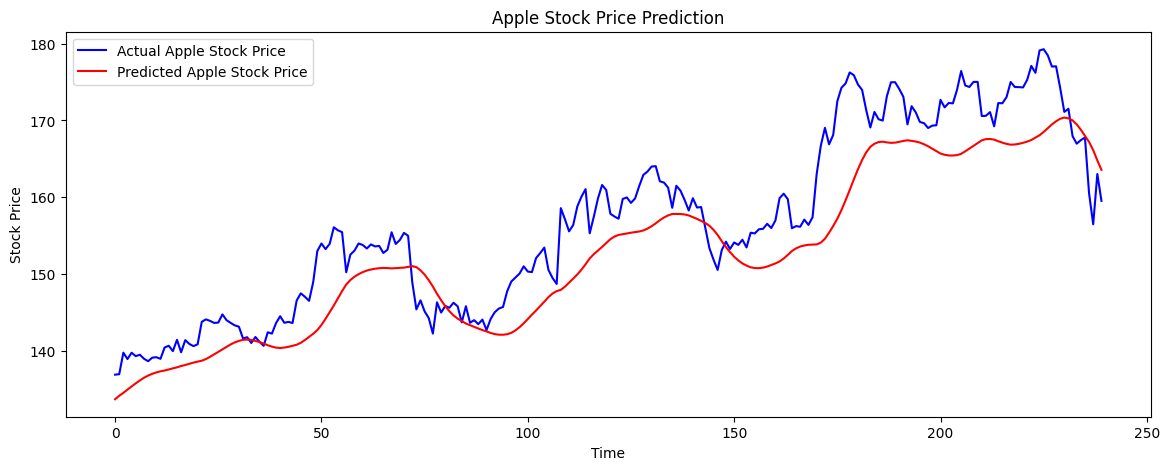

In [121]:
# Predict stock prices using the test data
predictions = model.predict(X_test)

# Inverse transform the scaled predictions and actual prices
predicted_stock_price = scaler.inverse_transform(predictions)
actual_stock_price = scaler.inverse_transform(y_test.reshape(-1, 1))

# Plot the results
plt.figure(figsize=(14, 5))
plt.plot(actual_stock_price, color='blue', label='Actual Apple Stock Price')
plt.plot(predicted_stock_price, color='red', label='Predicted Apple Stock Price')
plt.title('Apple Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

## 7. Evaluate the Model

Finally, let's evaluate the model's performance using metrics like Mean Absolute Error (MAE), Mean Squared Error (MSE), Root Mean Squared Error (RMSE).

In [122]:
from sklearn.metrics import mean_squared_error
import math

# Calculate RMSE
rmse = math.sqrt(mean_squared_error(actual_stock_price, predicted_stock_price))
print(f'Root Mean Squared Error: {rmse}')

Root Mean Squared Error: 5.775765411289425
